IN THIS PROJECT WE WILL DO COMPARISON BETWEEN SVM,DECISION TREE AND NAVE BAYES ON THE INDIAN DIABERES DATASET AND CHECK THAT WHICH ALGORITHEM HAVE BEST ACCURACU

In [188]:
import numpy as np  
import pandas as pd 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold


from sklearn.svm import SVC

import os
from sklearn import preprocessing
from sklearn import utils
%matplotlib inline

In [189]:
#TO LOAD DATA FILE

In [190]:

df = pd.read_csv("diabetes.csv")

In [191]:
# TO CHECK THE TOP FIVE ROWS OF THE GIVEN DATASET

In [192]:
df.head(5) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
#FOR BOTTOM 5 ROWS

In [194]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [195]:
#FOR TOTAL NUMBER OF ROWS AND COULMS IN THE DATASET

In [196]:
df.shape

(768, 9)

768 rows and 9 coloms. in the data set

In [197]:
#WE GET ALL THE INFORMATION RELATED TO THE DATA

In [198]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [199]:
df.describe()
 #to get the data inform of statistics form.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [200]:
#to check if there is any null value in the data set

In [201]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [202]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] #to remove all the zeros value from the dataset

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

# Data Visualization

In [203]:
#1 non diabetic 
#0 = diabetic

In [204]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person

df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

# DATA VISUALUZATION

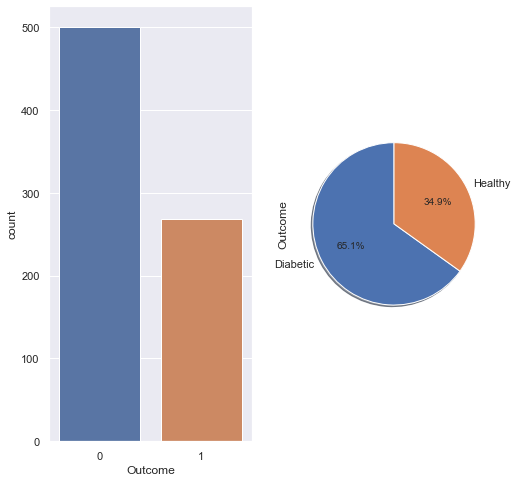

In [205]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

df.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

#make the histogram of each coulm in the data set.And this histogram show us the values from min to max

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E852FA190>,
      dtype=object)

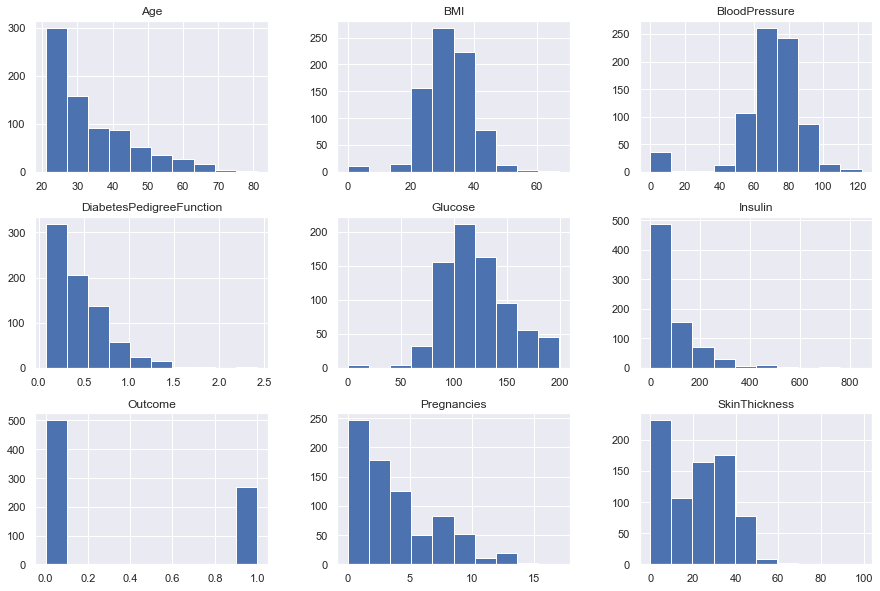

In [206]:
df.hist(figsize=(15,10))

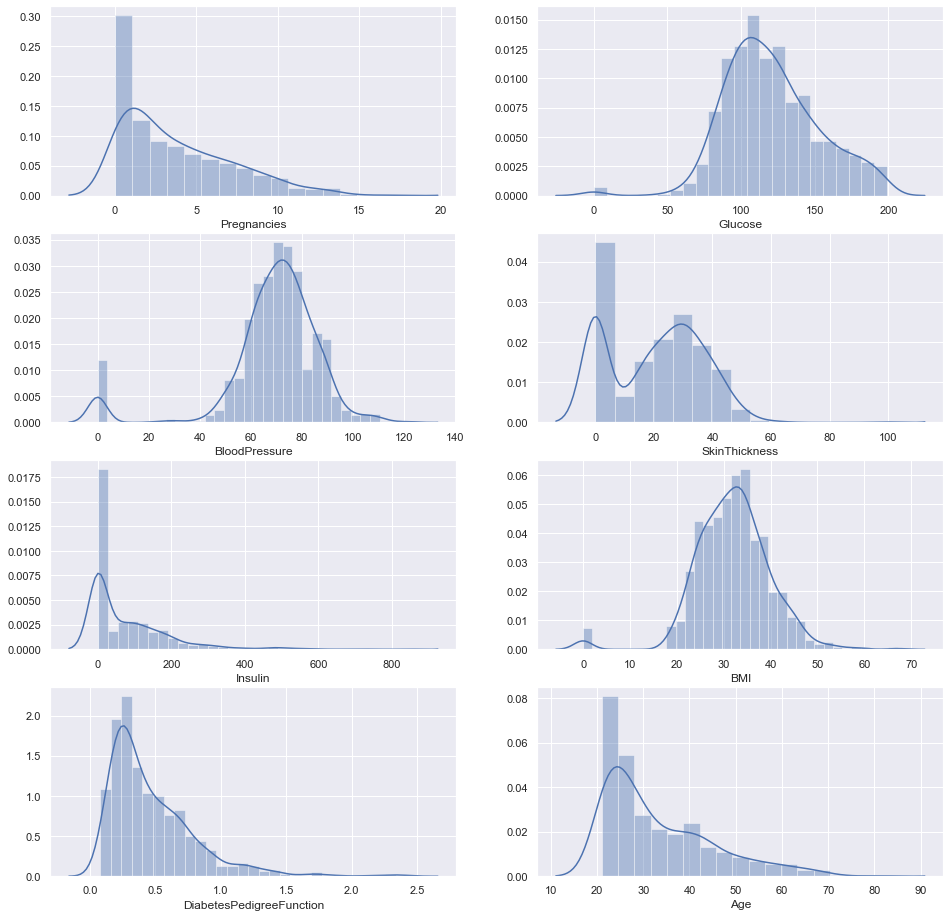

In [207]:

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])

In [208]:
#find the ralarionship of each coulm with respect to the other rest of coulms through pairplot

In [209]:
#hue is used to color the data with respect to the diabetic or nondiabetic. As we know above we
# have 500 diabetic person so reddish color represent diabetoc.

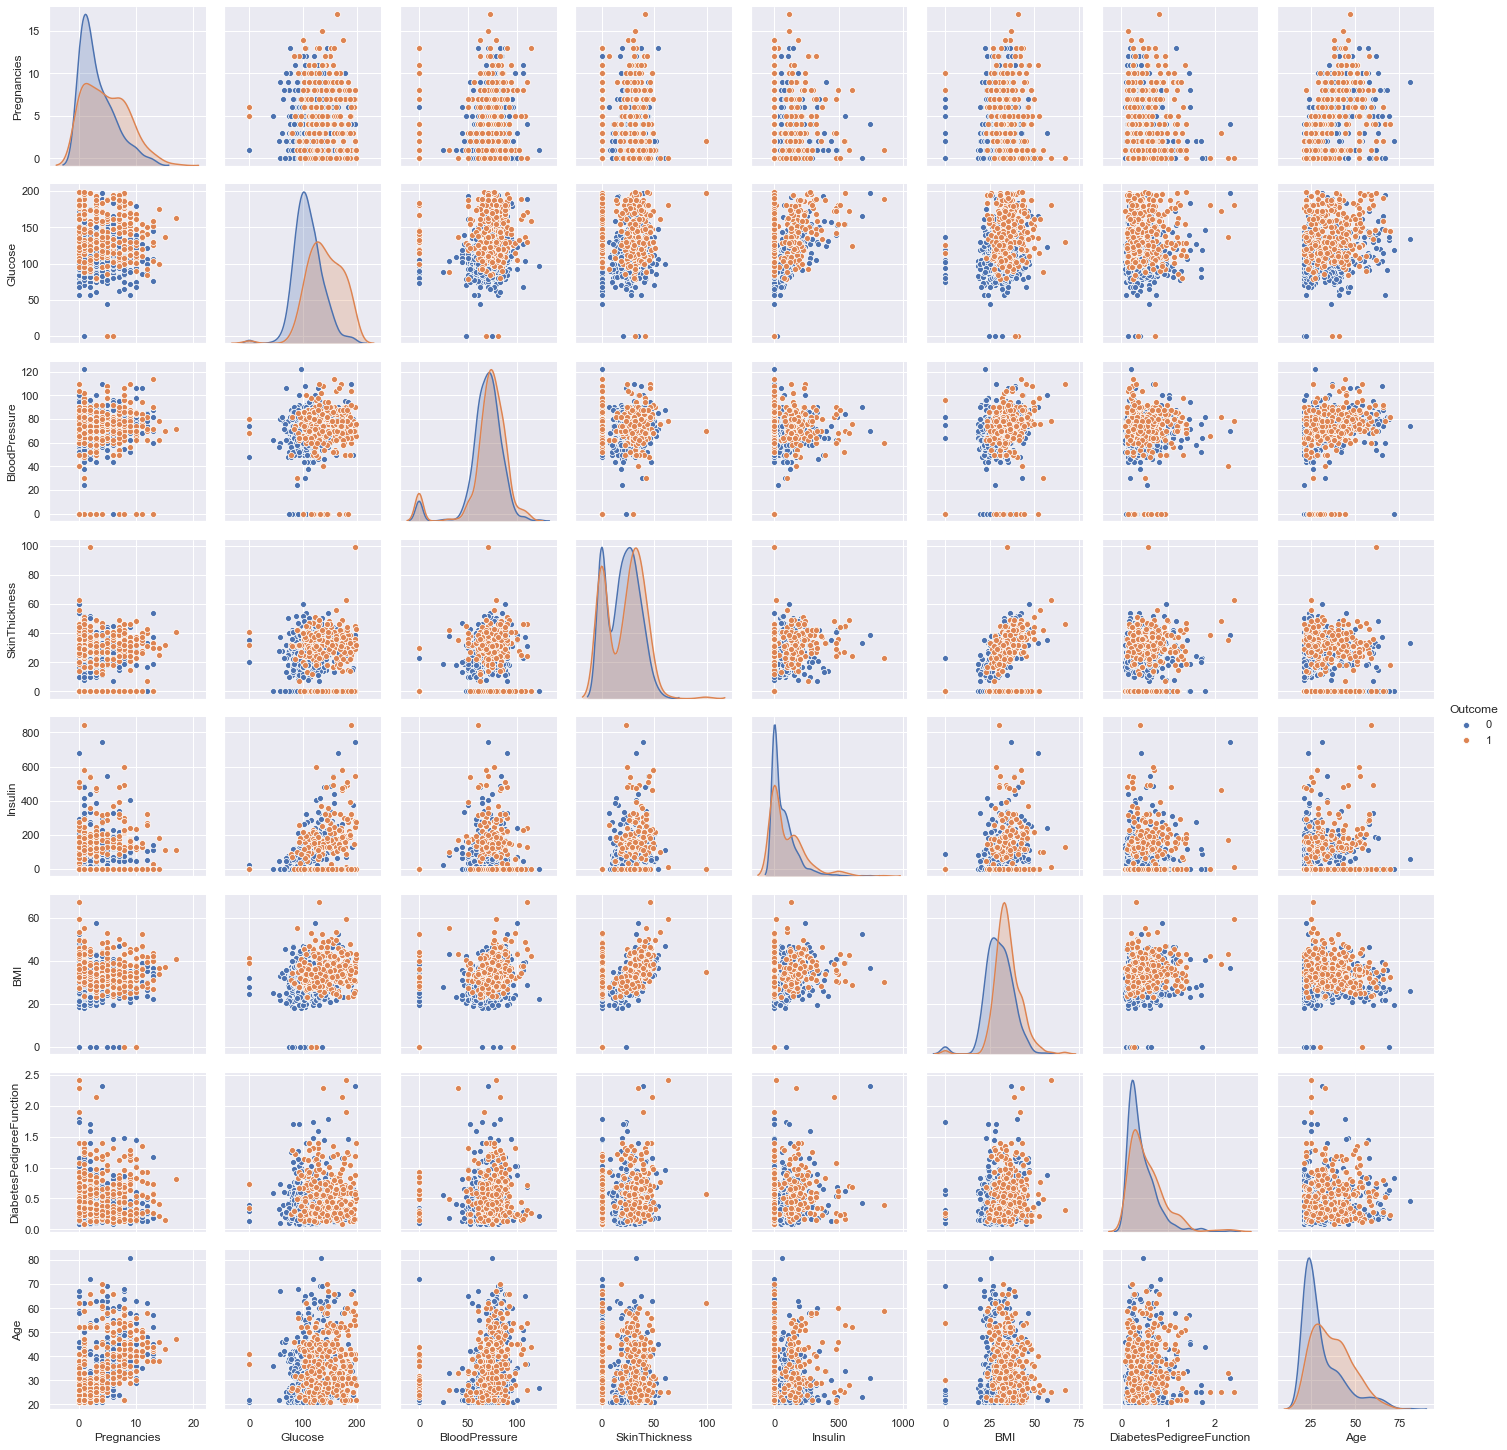

In [210]:

# pairplot--Multiple relationship of scatterplot

sns.pairplot(df,hue='Outcome')

In [211]:
## We apply 3 typrs of supervises ML algorithem on the data set and compare there accuracies.

# Random Forest Algorithm¶


In [212]:

from sklearn.tree import DecisionTreeClassifier

#data=pd.read_csv("diabetes.csv")

In [213]:
 

X=df[df.columns[0:-1]] #from first coulm to the last coulm
del(X['SkinThickness'])
del(X['BloodPressure'])
del(X['Pregnancies'])
del(X['Insulin'])
del(X['DiabetesPedigreeFunction'])
#del(X['Age'])
Y=df[df.columns[-1]] #upto the last coulm

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=80)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))# our required result

Accuracy on training set: 0.792
Accuracy on test set: 0.734


# SVM


In [ ]:
#SVM IS A ml algorithem  in which we seprate the data on the basis of hyper plane.

In [215]:
X = df.iloc[:, 0:8] #take all the rows and coulms from 0 to 8 and store data in x variable.
y = df.iloc[:, 8]    # #take all the rows and coulms from 0 to 8 and store data in y variable.



# FEATURE EXTRACTION

In [216]:
#features extractions it is a techniques in which we will extract or remove the features from the data according to our need or 
#model requirement

In [217]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X) # transform and fit the values according to our selected models.

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped  we drop this function because we cant get much information from this.
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.    0.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6      148             72             35        0  33.6   50
1            1       85             66             29        0  26.6   31
2            8      183             64              0        0  23.3   32
3            1       89             66             23       94  28.1   21
4            0      137             40             35      168  43.1   33
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [220]:
#split data 80/20 proportation

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [222]:
#features scaling

In [233]:
sc_X = StandardScaler()  # FEATURE SCALING IS USED TO NORMALIZE THE DATA
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [224]:
#implement SVM on inear kinel

In [225]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [234]:
#y_pred = classifier.predict(X_test)


In [235]:
#predict the test model

In [168]:

y_pred = classifier.predict(X_test)

In [169]:
#EVALUATE THE MODEL

In [170]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[98  9]
 [21 26]]
0.6341463414634146
0.8051948051948052


# NAVIE BAYES

In [171]:
print(df.describe())
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)


## Split data

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

# FEATURES SCALING

IN THIS WE SEPTATE THE DATA INTO TRANING AND TEST FROM SCALING PROCES WHICH IS ACTUALLLY NORMALIZATION

In [174]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# IMPLEMENT THE CLASSIFIER"

In [175]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [230]:
#to give periority to any coulm but we give non periority
GaussianNB(priors=None)


GaussianNB()

# PREDICT THE TEST SET RESULT

In [231]:
y_pred = classifier.predict(X_test)


# EVALUATE MODEL"

In [232]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[98  9]
 [21 26]]
0.8051948051948052


In [179]:
## ACCURACIES OF THESE 3 ALGORITHEMS ARE AS FOLLOWS

In [180]:
#Naive Bayes
#79 percent


In [182]:
#Random Forcast
#73.4 percent

In [184]:
#SVM
#80 Percent